# SPIRE Point-Source Catalogue in astroquery.esasky

[The SPIRE Point-Source Catalogue (SPSC)](http://archives.esac.esa.int/hsa/legacy/HPDP/SPIRE/SPIRE-P/SPSC/) was release in early February and was made available in [ESASky](sky.esa.int) interface. Due to some limitation of the current interface implementation of ESASky, only a subset of all columns were made available.

This notebook shows a simple usage of SPSC using astroquery.esasky module.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from astroquery.esasky import ESASky as esa
import astropy.units as u
from astropy.visualization import (ImageNormalize, PercentileInterval, AsinhStretch)
from astropy.wcs import WCS

import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
# get a list of the available catalogues
esa.list_catalogs()

['INTEGRAL',
 'XMM-EPIC',
 'XMM-OM',
 'XMM-SLEW',
 'Tycho-2',
 'Gaia DR1 TGAS',
 'Gaia DR1',
 'Hipparcos-2',
 'HSC',
 'Herschel-SPSC-250',
 'Herschel-SPSC-350',
 'Herschel-SPSC-500',
 'Planck-PGCC2',
 'Planck-PCCS2E',
 'Planck-PCCS2-HFI',
 'Planck-PCCS2-LFI',
 'Planck-PSZ']

In [3]:
# now query near object name:
result = esa.query_object_catalogs('Gamma Dra','Herschel-SPSC-250')
result[0]

name,ra [1],dec [1],snr [1],flux [1],flux_err [1],fluxdao [1],fluxdao_err [1],fluxtm2 [1],fluxtm2_err [1],pntsrc_flag,extsrc_flag,lowfwhm_flag,largegal_flag,mapedge_flag,ssocont_flag
object,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,object,object,object,object
HSPSC250A_J1756.60+5129.3,269.1514,51.4886,46.2,266.1,5.8,289.2,1.0,274.7,0.6,T,F,F,F,F,F


In [4]:
# we can also query within a region around the source, say in 5 arcmin radius
result = esa.query_region_catalogs('Gamma Dra',5*u.arcmin,'Herschel-SPSC-350')
result[0]

name,ra [1],dec [1],snr [1],flux [1],flux_err [1],fluxdao [1],fluxdao_err [1],fluxtm2 [1],fluxtm2_err [1],pntsrc_flag,extsrc_flag,lowfwhm_flag,largegal_flag,mapedge_flag,ssocont_flag
object,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,object,object,object,object
HSPSC350A_J1756.60+5129.3,269.1514,51.4885,22.5,143.5,6.4,157.3,1.1,145.2,0.6,T,F,F,F,F,F
HSPSC350A_J1756.30+5130.4,269.0769,51.5067,8.7,77.7,8.9,101.1,1.5,110.3,0.8,F,T,F,F,T,F
HSPSC350A_J1757.05+5131.3,269.2629,51.5218,6.3,60.0,9.5,53.0,0.9,55.4,0.6,T,F,F,F,F,F
HSPSC350A_J1756.11+5129.6,269.0289,51.4941,6.5,49.0,7.5,61.1,1.2,42.4,0.6,T,F,F,F,F,F
HSPSC350A_J1756.56+5126.9,269.1402,51.4484,4.2,38.4,9.0,50.6,1.4,44.2,0.7,T,F,F,F,F,F
HSPSC350A_J1756.86+5129.9,269.2163,51.4992,4.9,34.5,7.1,38.5,1.1,17.9,0.3,T,F,F,F,T,F
HSPSC350A_J1756.90+5127.6,269.2271,51.4604,3.1,34.1,10.9,42.5,1.7,52.0,1.1,F,T,F,F,F,F
HSPSC350A_J1756.72+5133.1,269.1802,51.5527,4.7,33.1,7.1,37.5,1.4,47.0,0.9,T,F,F,F,F,F
HSPSC350A_J1756.43+5128.2,269.1078,51.4702,3.9,29.2,7.5,40.2,1.4,28.5,0.5,T,F,F,F,T,F


In [5]:
# we can also search around coordinates
result = esa.query_region_catalogs('13 29 52.7 +47 11 43',5*u.arcmin,'Herschel-SPSC-250')
spsc250=result[0]
spsc250

name,ra [1],dec [1],snr [1],flux [1],flux_err [1],fluxdao [1],fluxdao_err [1],fluxtm2 [1],fluxtm2_err [1],pntsrc_flag,extsrc_flag,lowfwhm_flag,largegal_flag,mapedge_flag,ssocont_flag
object,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,object,object,object,object
HSPSC250A_J1329.86+4711.8,202.4651,47.1981,4.1,6843.2,1666.9,6566.4,14.0,32542.6,139.9,F,T,F,T,F,F
HSPSC250A_J1329.99+4715.9,202.4979,47.2664,14.6,3490.3,239.5,3853.4,5.7,4599.1,8.1,F,T,T,T,T,F
HSPSC250A_J1330.06+4715.6,202.5154,47.2606,3.3,1784.1,541.9,670.9,31.1,1359.0,646.5,F,F,T,T,F,F
HSPSC250A_J1329.73+4710.3,202.4337,47.173,3.1,1573.6,504.5,2190.6,8.2,2683.5,16.1,F,T,F,T,F,F
HSPSC250A_J1330.04+4709.8,202.5103,47.1637,3.5,846.2,241.7,1295.2,9.3,1436.3,9.9,F,T,F,T,F,F
HSPSC250A_J1329.65+4708.6,202.414,47.1444,5.1,840.6,164.8,1227.5,8.3,1193.8,6.4,F,T,F,T,F,F
HSPSC250A_J1329.50+4712.8,202.3771,47.2144,3.8,88.1,23.1,92.5,5.2,80.1,3.2,F,F,T,T,T,F


In [6]:
# Now check the maps
maps = esa.query_object_maps('13 29 52.7 +47 11 43', 'HERSCHEL')
maps[0]['observation_id', 'instrument', 'filter', 'duration'].pprint()

observation_id instrument     filter    duration [1]
-------------- ---------- ------------- ------------
    1342254493      SPIRE 250, 350, 500        721.0
    1342224023      SPIRE 250, 350, 500        721.0
    1342188329       PACS       70, 160       2211.0
    1342247978      SPIRE 250, 350, 500        721.0
    1342188328       PACS       70, 160       2211.0
    1342224973      SPIRE 250, 350, 500        721.0
    1342234914      SPIRE 250, 350, 500        721.0
    1342188589      SPIRE 250, 350, 500       1577.0
    1342237513      SPIRE 250, 350, 500        721.0


In [7]:
# let's download only the PACS map for OBSID 1342188329, index 2
nmaps = len(maps[0])
maps[0].remove_rows(np.delete(range(nmaps),2))
maps[0]["observation_id","filter","duration"].pprint()

observation_id  filter duration [1]
-------------- ------- ------------
    1342188329 70, 160       2211.0


In [8]:
# OK, now we can download the maps
maps_data = esa.get_maps(maps)

Starting download of HERSCHEL data. (1 files)
INFO: Maps available at /Users/ivaltchanov/Dropbox/Work/Python/herspy/notebooks/Maps [astroquery.esasky.core]


In [9]:
maps_data

{'HERSCHEL': [{'160': [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x111256e10>, <astropy.io.fits.hdu.image.ImageHDU object at 0x11125ff28>, <astropy.io.fits.hdu.image.ImageHDU object at 0x111260be0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x11126f710>, <astropy.io.fits.hdu.image.ImageHDU object at 0x11126fd30>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x111272cf8>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x111276940>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x11127f198>],
   '70': [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x11123a908>, <astropy.io.fits.hdu.image.ImageHDU object at 0x111282ba8>, <astropy.io.fits.hdu.image.ImageHDU object at 0x111286f60>, <astropy.io.fits.hdu.image.ImageHDU object at 0x11128fa90>, <astropy.io.fits.hdu.image.ImageHDU object at 0x111293438>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x111293d68>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x111296cc0>, <astropy.io.fits.hdu.table.BinTableHDU object a

In [11]:
hdu = maps_data['HERSCHEL'][0]['70']
hdu.info()
hdu[0].header

Filename: Maps/HERSCHEL/hpacs_25HPPJSMAPB_blue_1330_p4712_00_v1.0_1470494057874.fits.gz
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU     286   ()      
  1  image       ImageHDU        52   (911, 922)   float64   
  2  coverage    ImageHDU        55   (911, 922)   float64   
  3  stDev       ImageHDU        55   (911, 922)   float64   
  4  History     ImageHDU        23   ()      
  5  HistoryScript  BinTableHDU     39   81R x 1C   [321A]   
  6  HistoryTasks  BinTableHDU     46   55R x 4C   [1K, 38A, 1K, 9A]   
  7  HistoryParameters  BinTableHDU     74   507R x 10C   [1K, 21A, 7A, 31A, 1L, 1K, 1L, 58A, 11A, 35A]   


SIMPLE  =                    T / Java FITS: Sat Aug 06 14:42:17 CEST 2016       
BITPIX  =                   32                                                  
NAXIS   =                    0 / Dimensionality                                 
EXTEND  =                    T / May contain datasets                           
TIMESYS = 'UTC     '           / All dates are in UTC time                      
LONGSTRN= 'OGIP 1.0'           / The OGIP long string convention may be used.   
COMMENT This FITS file may contain long string keyword values that are          
COMMENT continued over multiple keywords.  This convention uses the  '&'        
COMMENT character at the end of a string which is then continued                
COMMENT on subsequent keywords whose name = 'CONTINUE'.                         
          ---------------Herschel FITS Data Generator---------------            
          This product is generated by Herschel software.                       
HCSS____=                   

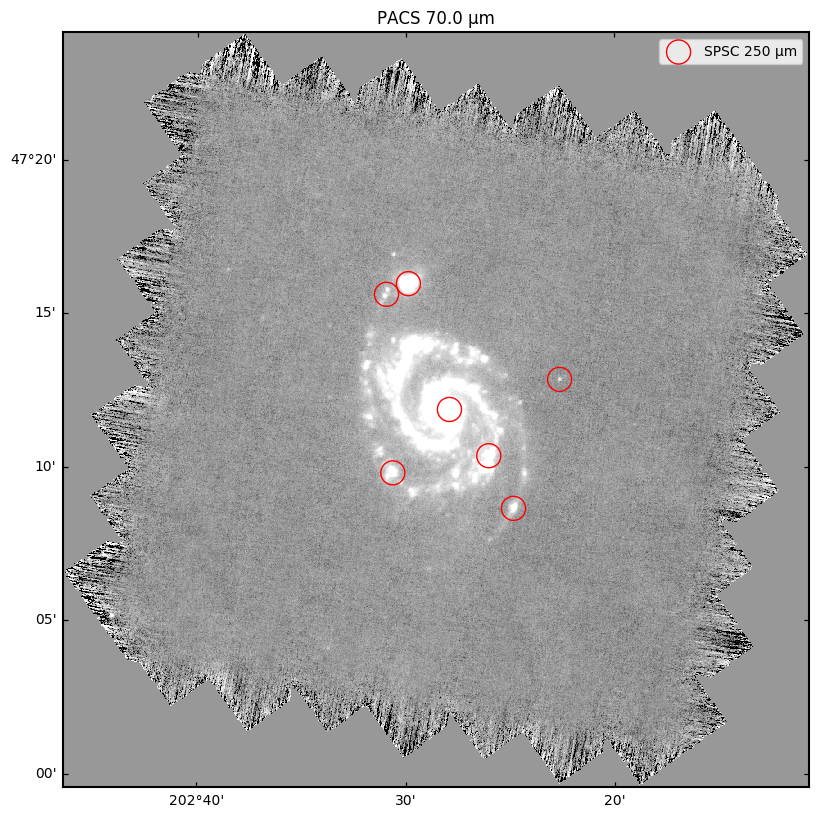

In [13]:
# now display
wcs = WCS(hdu['image'].header)
fig = plt.figure(figsize=(10,10),dpi=100)
pp = 98.0 # colour cut percentage
ax = fig.add_subplot(111,projection=wcs)
ax.set_title("PACS %s µm"%hdu[0].header['WAVELNTH'])
norm = ImageNormalize(hdu['image'].data,interval=PercentileInterval(pp),stretch=AsinhStretch())
ax.imshow(hdu['image'].data,cmap=plt.cm.gray,origin='lower',interpolation='nearest',norm=norm)
# and add the SPSC sources
p1 = ax.scatter(spsc250['ra'],spsc250['dec'],transform=ax.get_transform('world'), \
        s=300, edgecolor='red', facecolor='none', label='SPSC 250 µm')
ax.legend()
#
# note that all sources in spsc250 have largegalflag = True i.e. these are all within the countours of a large galaxy 
# (as it is obvious from the figure)
#

In [52]:
spsc250

name,ra [1],dec [1],snr [1],flux [1],flux_err [1],fluxdao [1],fluxdao_err [1],fluxtm2 [1],fluxtm2_err [1],pntsrc_flag,extsrc_flag,lowfwhm_flag,largegal_flag,mapedge_flag,ssocont_flag
object,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,object,object,object,object
HSPSC250A_J1329.86+4711.8,202.4651,47.1981,4.1,6843.2,1666.9,6566.4,14.0,32542.6,139.9,F,T,F,T,F,F
HSPSC250A_J1329.99+4715.9,202.4979,47.2664,14.6,3490.3,239.5,3853.4,5.7,4599.1,8.1,F,T,T,T,T,F
HSPSC250A_J1330.06+4715.6,202.5154,47.2606,3.3,1784.1,541.9,670.9,31.1,1359.0,646.5,F,F,T,T,F,F
HSPSC250A_J1329.73+4710.3,202.4337,47.173,3.1,1573.6,504.5,2190.6,8.2,2683.5,16.1,F,T,F,T,F,F
HSPSC250A_J1330.04+4709.8,202.5103,47.1637,3.5,846.2,241.7,1295.2,9.3,1436.3,9.9,F,T,F,T,F,F
HSPSC250A_J1329.65+4708.6,202.414,47.1444,5.1,840.6,164.8,1227.5,8.3,1193.8,6.4,F,T,F,T,F,F
HSPSC250A_J1329.50+4712.8,202.3771,47.2144,3.8,88.1,23.1,92.5,5.2,80.1,3.2,F,F,T,T,T,F
